In [3]:
# Cross-Domain Engagement Score Analysis with Clustering
# Comprehensive statistical analysis using Shannon entropy and clustering insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import entropy
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Starting Cross-Domain Engagement Analysis...")

Libraries imported successfully!
Starting Cross-Domain Engagement Analysis...


In [4]:
# Load the cross-domain engagement features dataset
df_features = pd.read_csv('../data/processed_data/cross_domain_engagement_features.csv')

print(f"Dataset shape: {df_features.shape}")
print(f"Total wallets: {len(df_features)}")
print("\nDataset columns:")
print(df_features.columns.tolist())

# Focus on the cross-domain engagement score
print(f"\nCross-Domain Engagement Score Summary:")
print(f"Min: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].min():.6f}")
print(f"Max: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].max():.6f}")
print(f"Mean: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].mean():.6f}")
print(f"Median: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].median():.6f}")
print(f"Std: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].std():.6f}")

# Check for missing values
print(f"\nMissing values in CROSS_DOMAIN_ENGAGEMENT_SCORE: {df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'].isnull().sum()}")

df_features.head()

Dataset shape: (20174, 34)
Total wallets: 20174

Dataset columns:
['WALLET', 'TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD', 'TOTAL_EVENTS', 'DEX_EVENTS_PROPORTION', 'GAMES_EVENTS_PROPORTION', 'CEX_EVENTS_PROPORTION', 'DAPP_EVENTS_PROPORTION', 'CHADMIN_EVENTS_PROPORTION', 'DEFI_EVENTS_PROPORTION', 'BRIDGE_EVENTS_PROPORTION', 'NFT_EVENTS_PROPORTION', 'TOKEN_EVENTS_PROPORTION', 'FLOTSAM_EVENTS_PROPORTION', 'CROSS_DOMAIN_ENGAGEMENT_SCORE']

Cross-Domain Engagement Score Summary:
Min: 0.000000
Max: 1.000000
Mean: 0.384247
Median: 0.262682
Std: 0.399597

Missing values in CROSS_DOMAIN_ENGAGEMENT_SCORE: 0


,WALLET,TX_PER_MONTH,TOKEN_DIVERSITY,PROTOCOL_DIVERSITY,TOTAL_TRANSFER_USD,INTERACTION_DIVERSITY,ACTIVE_DURATION_DAYS,AVG_TRANSFER_USD,USD_TRANSFER_STDDEV,DEX_EVENTS,...,GAMES_EVENTS_PROPORTION,CEX_EVENTS_PROPORTION,DAPP_EVENTS_PROPORTION,CHADMIN_EVENTS_PROPORTION,DEFI_EVENTS_PROPORTION,BRIDGE_EVENTS_PROPORTION,NFT_EVENTS_PROPORTION,TOKEN_EVENTS_PROPORTION,FLOTSAM_EVENTS_PROPORTION,CROSS_DOMAIN_ENGAGEMENT_SCORE
0,0xecb113be97a619aa4d070491505847000f964448,8.166667,6,9,2840.47,5,177,41.166232,88.745481,5,...,0.000000,0.0,0.0,0.0,0.0,0.029412,0.0,0.823529,0.0,0.496545
1,0x76c1cf35f54c67bc4fec5ba1411f5c0825a4a50d,8.666667,2,8,3733.59,10,172,56.569545,185.180716,1,...,0.916667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.413817
2,0x2465ba1d82c7faf5cfc1b4f0e3c606800e1caac9,13.000000,5,26,3771.93,14,169,62.865500,135.890912,0,...,0.000000,0.0,0.0,0.0,0.0,0.206897,0.0,0.793103,0.0,0.735509
3,0xa5a1a2abcc2b67990b37b749c4e840f1fa093c97,6.833333,1,2,12977.28,2,170,370.779429,318.130714,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000
4,0xa967e15e71455940dfab4c08719abae50401babd,7.500000,5,6,18935.76,6,156,236.697000,478.737614,5,...,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.625000,0.0,0.819448


In [11]:
# Load clustering results
df_clusters = pd.read_csv('../data/processed_data/clustering_results/cluster_labels.csv')

print(f"Clustering results shape: {df_clusters.shape}")
print(f"Unique clusters: {sorted(df_clusters['cluster_label'].unique())}")
print(f"Cluster distribution:")
cluster_counts = df_clusters['cluster_label'].value_counts().sort_index()
print(cluster_counts)

# Merge the datasets (assuming they have the same order)
if len(df_features) == len(df_clusters):
    df_merged = df_features.copy()
    df_merged['cluster_label'] = df_clusters['cluster_label'].values
    print(f"\nSuccessfully merged datasets. Final shape: {df_merged.shape}")
else:
    print(f"\nWarning: Dataset size mismatch!")
    print(f"Features: {len(df_features)}, Clusters: {len(df_clusters)}")
    
# Display cluster distribution with percentages
print(f"\nDetailed Cluster Analysis:")
for cluster in sorted(df_merged['cluster_label'].unique()):
    count = (df_merged['cluster_label'] == cluster).sum()
    percentage = (count / len(df_merged)) * 100
    print(f"Cluster {cluster}: {count:,} wallets ({percentage:.2f}%)")

Clustering results shape: (20174, 1)
Unique clusters: [np.int64(-1), np.int64(0), np.int64(1)]
Cluster distribution:
cluster_label
-1       71
 0     8713
 1    11390
Name: count, dtype: int64

Successfully merged datasets. Final shape: (20174, 35)

Detailed Cluster Analysis:
Cluster -1: 71 wallets (0.35%)
Cluster 0: 8,713 wallets (43.19%)
Cluster 1: 11,390 wallets (56.46%)


In [12]:
# Comprehensive Cross-Domain Engagement Score Analysis by Cluster
print("="*80)
print("CROSS-DOMAIN ENGAGEMENT SCORE ANALYSIS BY CLUSTER")
print("="*80)

# Calculate detailed statistics for each cluster
cluster_stats = []

for cluster in sorted(df_merged['cluster_label'].unique()):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    
    stats_dict = {
        'cluster': cluster,
        'count': len(cluster_data),
        'mean': cluster_data.mean(),
        'median': cluster_data.median(),
        'std': cluster_data.std(),
        'min': cluster_data.min(),
        'max': cluster_data.max(),
        'q25': cluster_data.quantile(0.25),
        'q75': cluster_data.quantile(0.75),
        'iqr': cluster_data.quantile(0.75) - cluster_data.quantile(0.25),
        'skewness': cluster_data.skew(),
        'kurtosis': cluster_data.kurtosis(),
        'zeros': (cluster_data == 0).sum(),
        'zeros_pct': (cluster_data == 0).sum() / len(cluster_data) * 100,
        'ones': (cluster_data == 1).sum(),
        'ones_pct': (cluster_data == 1).sum() / len(cluster_data) * 100
    }
    cluster_stats.append(stats_dict)

# Convert to DataFrame for easy viewing
stats_df = pd.DataFrame(cluster_stats)

print("\nDETAILED STATISTICS BY CLUSTER:")
print("-" * 80)
for _, row in stats_df.iterrows():
    cluster_label = "Noise/Outliers" if row['cluster'] == -1 else f"Cluster {row['cluster']}"
    print(f"\n{cluster_label}:")
    print(f"  Count: {row['count']:,} wallets")
    print(f"  Mean Score: {row['mean']:.6f}")
    print(f"  Median Score: {row['median']:.6f}")
    print(f"  Std Dev: {row['std']:.6f}")
    print(f"  Range: [{row['min']:.6f}, {row['max']:.6f}]")
    print(f"  IQR: {row['iqr']:.6f} (Q1: {row['q25']:.6f}, Q3: {row['q75']:.6f})")
    print(f"  Skewness: {row['skewness']:.6f}")
    print(f"  Kurtosis: {row['kurtosis']:.6f}")
    print(f"  Zero Scores: {row['zeros']:,} ({row['zeros_pct']:.2f}%)")
    print(f"  Perfect Scores (1.0): {row['ones']:,} ({row['ones_pct']:.2f}%)")

# Display summary table
print(f"\n\nSUMMARY TABLE:")
print("-" * 80)
display_cols = ['cluster', 'count', 'mean', 'median', 'std', 'min', 'max', 'zeros_pct', 'ones_pct']
print(stats_df[display_cols].round(6))

CROSS-DOMAIN ENGAGEMENT SCORE ANALYSIS BY CLUSTER

DETAILED STATISTICS BY CLUSTER:
--------------------------------------------------------------------------------

Noise/Outliers:
  Count: 71.0 wallets
  Mean Score: 0.088686
  Median Score: 0.000000
  Std Dev: 0.237039
  Range: [0.000000, 1.000000]
  IQR: 0.000000 (Q1: 0.000000, Q3: 0.000000)
  Skewness: 2.892783
  Kurtosis: 7.540386
  Zero Scores: 58.0 (81.69%)
  Perfect Scores (1.0): 1.0 (1.41%)

Cluster 0.0:
  Count: 8,713.0 wallets
  Mean Score: 0.140923
  Median Score: 0.000000
  Std Dev: 0.303256
  Range: [0.000000, 1.000000]
  IQR: 0.000000 (Q1: 0.000000, Q3: 0.000000)
  Skewness: 1.931872
  Kurtosis: 2.097063
  Zero Scores: 6,866.0 (78.80%)
  Perfect Scores (1.0): 158.0 (1.81%)

Cluster 1.0:
  Count: 11,390.0 wallets
  Mean Score: 0.572225
  Median Score: 0.702398
  Std Dev: 0.361884
  Range: [0.000000, 1.000000]
  IQR: 0.641258 (Q1: 0.242832, Q3: 0.884089)
  Skewness: -0.568829
  Kurtosis: -1.210390
  Zero Scores: 2,472.0 (21

In [13]:
# SHANNON ENTROPY ANALYSIS
print("="*80)
print("SHANNON ENTROPY ANALYSIS FOR CROSS-DOMAIN ENGAGEMENT SCORES")
print("="*80)

def calculate_shannon_entropy(scores, bins=50):
    """
    Calculate Shannon entropy for cross-domain engagement scores
    """
    # Create histogram to get probability distribution
    hist, bin_edges = np.histogram(scores, bins=bins, range=(0, 1))
    
    # Convert counts to probabilities
    probabilities = hist / np.sum(hist)
    
    # Remove zero probabilities to avoid log(0)
    probabilities = probabilities[probabilities > 0]
    
    # Calculate Shannon entropy
    shannon_entropy = -np.sum(probabilities * np.log2(probabilities))
    
    # Calculate normalized entropy (0 to 1 scale)
    max_entropy = np.log2(bins)
    normalized_entropy = shannon_entropy / max_entropy
    
    return shannon_entropy, normalized_entropy, hist, bin_edges

# Calculate Shannon entropy for each cluster
entropy_results = []

print("SHANNON ENTROPY CALCULATIONS:")
print("-" * 60)

for cluster in sorted(df_merged['cluster_label'].unique()):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    
    # Calculate with different bin sizes for robustness
    entropies_10 = calculate_shannon_entropy(cluster_data, bins=10)
    entropies_25 = calculate_shannon_entropy(cluster_data, bins=25)
    entropies_50 = calculate_shannon_entropy(cluster_data, bins=50)
    
    cluster_label = "Noise/Outliers" if cluster == -1 else f"Cluster {cluster}"
    
    print(f"\n{cluster_label} (n={len(cluster_data):,}):")
    print(f"  Shannon Entropy (10 bins): {entropies_10[0]:.6f} (normalized: {entropies_10[1]:.6f})")
    print(f"  Shannon Entropy (25 bins): {entropies_25[0]:.6f} (normalized: {entropies_25[1]:.6f})")
    print(f"  Shannon Entropy (50 bins): {entropies_50[0]:.6f} (normalized: {entropies_50[1]:.6f})")
    
    # Store results
    entropy_results.append({
        'cluster': cluster,
        'cluster_label': cluster_label,
        'n_wallets': len(cluster_data),
        'entropy_10_bins': entropies_10[0],
        'entropy_25_bins': entropies_25[0],
        'entropy_50_bins': entropies_50[0],
        'normalized_entropy_10': entropies_10[1],
        'normalized_entropy_25': entropies_25[1],
        'normalized_entropy_50': entropies_50[1]
    })

# Overall dataset entropy
overall_entropy_10 = calculate_shannon_entropy(df_merged['CROSS_DOMAIN_ENGAGEMENT_SCORE'], bins=10)
overall_entropy_25 = calculate_shannon_entropy(df_merged['CROSS_DOMAIN_ENGAGEMENT_SCORE'], bins=25)
overall_entropy_50 = calculate_shannon_entropy(df_merged['CROSS_DOMAIN_ENGAGEMENT_SCORE'], bins=50)

print(f"\nOVERALL DATASET (n={len(df_merged):,}):")
print(f"  Shannon Entropy (10 bins): {overall_entropy_10[0]:.6f} (normalized: {overall_entropy_10[1]:.6f})")
print(f"  Shannon Entropy (25 bins): {overall_entropy_25[0]:.6f} (normalized: {overall_entropy_25[1]:.6f})")
print(f"  Shannon Entropy (50 bins): {overall_entropy_50[0]:.6f} (normalized: {overall_entropy_50[1]:.6f})")

# Create summary DataFrame
entropy_df = pd.DataFrame(entropy_results)
print(f"\n\nSHANNON ENTROPY SUMMARY TABLE:")
print("-" * 80)
print(entropy_df[['cluster_label', 'n_wallets', 'entropy_25_bins', 'normalized_entropy_25']].round(6))

SHANNON ENTROPY ANALYSIS FOR CROSS-DOMAIN ENGAGEMENT SCORES
SHANNON ENTROPY CALCULATIONS:
------------------------------------------------------------

Noise/Outliers (n=71):
  Shannon Entropy (10 bins): 1.099244 (normalized: 0.330905)
  Shannon Entropy (25 bins): 1.233185 (normalized: 0.265552)
  Shannon Entropy (50 bins): 1.336185 (normalized: 0.236750)

Cluster 0 (n=8,713):
  Shannon Entropy (10 bins): 1.331480 (normalized: 0.400815)
  Shannon Entropy (25 bins): 1.637945 (normalized: 0.352712)
  Shannon Entropy (50 bins): 1.826931 (normalized: 0.323703)

Cluster 1 (n=11,390):
  Shannon Entropy (10 bins): 2.927405 (normalized: 0.881237)
  Shannon Entropy (25 bins): 3.979241 (normalized: 0.856883)
  Shannon Entropy (50 bins): 4.754262 (normalized: 0.842378)

OVERALL DATASET (n=20,174):
  Shannon Entropy (10 bins): 2.489118 (normalized: 0.749299)
  Shannon Entropy (25 bins): 3.218795 (normalized: 0.693130)
  Shannon Entropy (50 bins): 3.745102 (normalized: 0.663572)


SHANNON ENTROPY S

In [14]:
# STATISTICAL SIGNIFICANCE TESTING
print("="*80)
print("STATISTICAL SIGNIFICANCE TESTING")
print("="*80)

from scipy.stats import kruskal, mannwhitneyu, chi2_contingency
from itertools import combinations

# Get data for each cluster (excluding noise for main analysis)
cluster_0_scores = df_merged[df_merged['cluster_label'] == 0]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
cluster_1_scores = df_merged[df_merged['cluster_label'] == 1]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
noise_scores = df_merged[df_merged['cluster_label'] == -1]['CROSS_DOMAIN_ENGAGEMENT_SCORE']

# Kruskal-Wallis test (non-parametric ANOVA equivalent)
print("KRUSKAL-WALLIS TEST (All clusters including noise):")
h_stat, p_value = kruskal(cluster_0_scores, cluster_1_scores, noise_scores)
print(f"  H-statistic: {h_stat:.6f}")
print(f"  P-value: {p_value:.2e}")
print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Pairwise Mann-Whitney U tests
print(f"\nPAIRWISE MANN-WHITNEY U TESTS:")
print("-" * 50)

cluster_pairs = [
    ('Cluster 0', 'Cluster 1', cluster_0_scores, cluster_1_scores),
    ('Cluster 0', 'Noise/Outliers', cluster_0_scores, noise_scores),
    ('Cluster 1', 'Noise/Outliers', cluster_1_scores, noise_scores)
]

for name1, name2, data1, data2 in cluster_pairs:
    u_stat, p_val = mannwhitneyu(data1, data2, alternative='two-sided')
    effect_size = 1 - (2 * u_stat) / (len(data1) * len(data2))  # Glass's r
    
    print(f"\n{name1} vs {name2}:")
    print(f"  U-statistic: {u_stat:.0f}")
    print(f"  P-value: {p_val:.2e}")
    print(f"  Effect size (r): {effect_size:.6f}")
    print(f"  Significant: {'Yes' if p_val < 0.05 else 'No'}")

# Additional insights
print(f"\n\nADDITIONAL INSIGHTS:")
print("-" * 50)

# Score distribution analysis
score_ranges = [(0, 0.1), (0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.0)]
print(f"\nScore Range Distribution by Cluster:")
for low, high in score_ranges:
    print(f"\nRange [{low:.1f}, {high:.1f}]:")
    for cluster in sorted(df_merged['cluster_label'].unique()):
        cluster_data = df_merged[df_merged['cluster_label'] == cluster]
        in_range = ((cluster_data['CROSS_DOMAIN_ENGAGEMENT_SCORE'] >= low) & 
                   (cluster_data['CROSS_DOMAIN_ENGAGEMENT_SCORE'] < high)).sum()
        pct = (in_range / len(cluster_data)) * 100
        cluster_name = "Noise" if cluster == -1 else f"Cluster {cluster}"
        print(f"  {cluster_name}: {in_range:,} ({pct:.2f}%)")

# Concentration measures
print(f"\n\nCONCENTRATION MEASURES:")
print("-" * 50)
for cluster in sorted(df_merged['cluster_label'].unique()):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    cluster_name = "Noise/Outliers" if cluster == -1 else f"Cluster {cluster}"
    
    # Gini coefficient (measure of inequality)
    sorted_scores = np.sort(cluster_data)
    n = len(sorted_scores)
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * sorted_scores)) / (n * np.sum(sorted_scores)) - (n + 1) / n
    
    # Coefficient of variation
    cv = cluster_data.std() / cluster_data.mean() if cluster_data.mean() > 0 else float('inf')
    
    print(f"\n{cluster_name}:")
    print(f"  Gini Coefficient: {gini:.6f}")
    print(f"  Coefficient of Variation: {cv:.6f}")
    print(f"  Entropy (25 bins): {entropy_df[entropy_df['cluster'] == cluster]['entropy_25_bins'].iloc[0]:.6f}")

STATISTICAL SIGNIFICANCE TESTING
KRUSKAL-WALLIS TEST (All clusters including noise):
  H-statistic: 5661.889236
  P-value: 0.00e+00
  Significant difference: Yes

PAIRWISE MANN-WHITNEY U TESTS:
--------------------------------------------------

Cluster 0 vs Cluster 1:
  U-statistic: 20628504
  P-value: 0.00e+00
  Effect size (r): 0.584275
  Significant: Yes

Cluster 0 vs Noise/Outliers:
  U-statistic: 321846
  P-value: 4.10e-01
  Effect size (r): -0.040525
  Significant: No

Cluster 1 vs Noise/Outliers:
  U-statistic: 670112
  P-value: 6.95e-22
  Effect size (r): -0.657279
  Significant: Yes


ADDITIONAL INSIGHTS:
--------------------------------------------------

Score Range Distribution by Cluster:

Range [0.0, 0.1]:
  Noise: 59 (83.10%)
  Cluster 0: 6,912 (79.33%)
  Cluster 1: 2,533 (22.24%)

Range [0.1, 0.3]:
  Noise: 5 (7.04%)
  Cluster 0: 269 (3.09%)
  Cluster 1: 514 (4.51%)

Range [0.3, 0.5]:
  Noise: 1 (1.41%)
  Cluster 0: 240 (2.75%)
  Cluster 1: 952 (8.36%)

Range [0.5, 0.7

CREATING COMPREHENSIVE VISUALIZATIONS


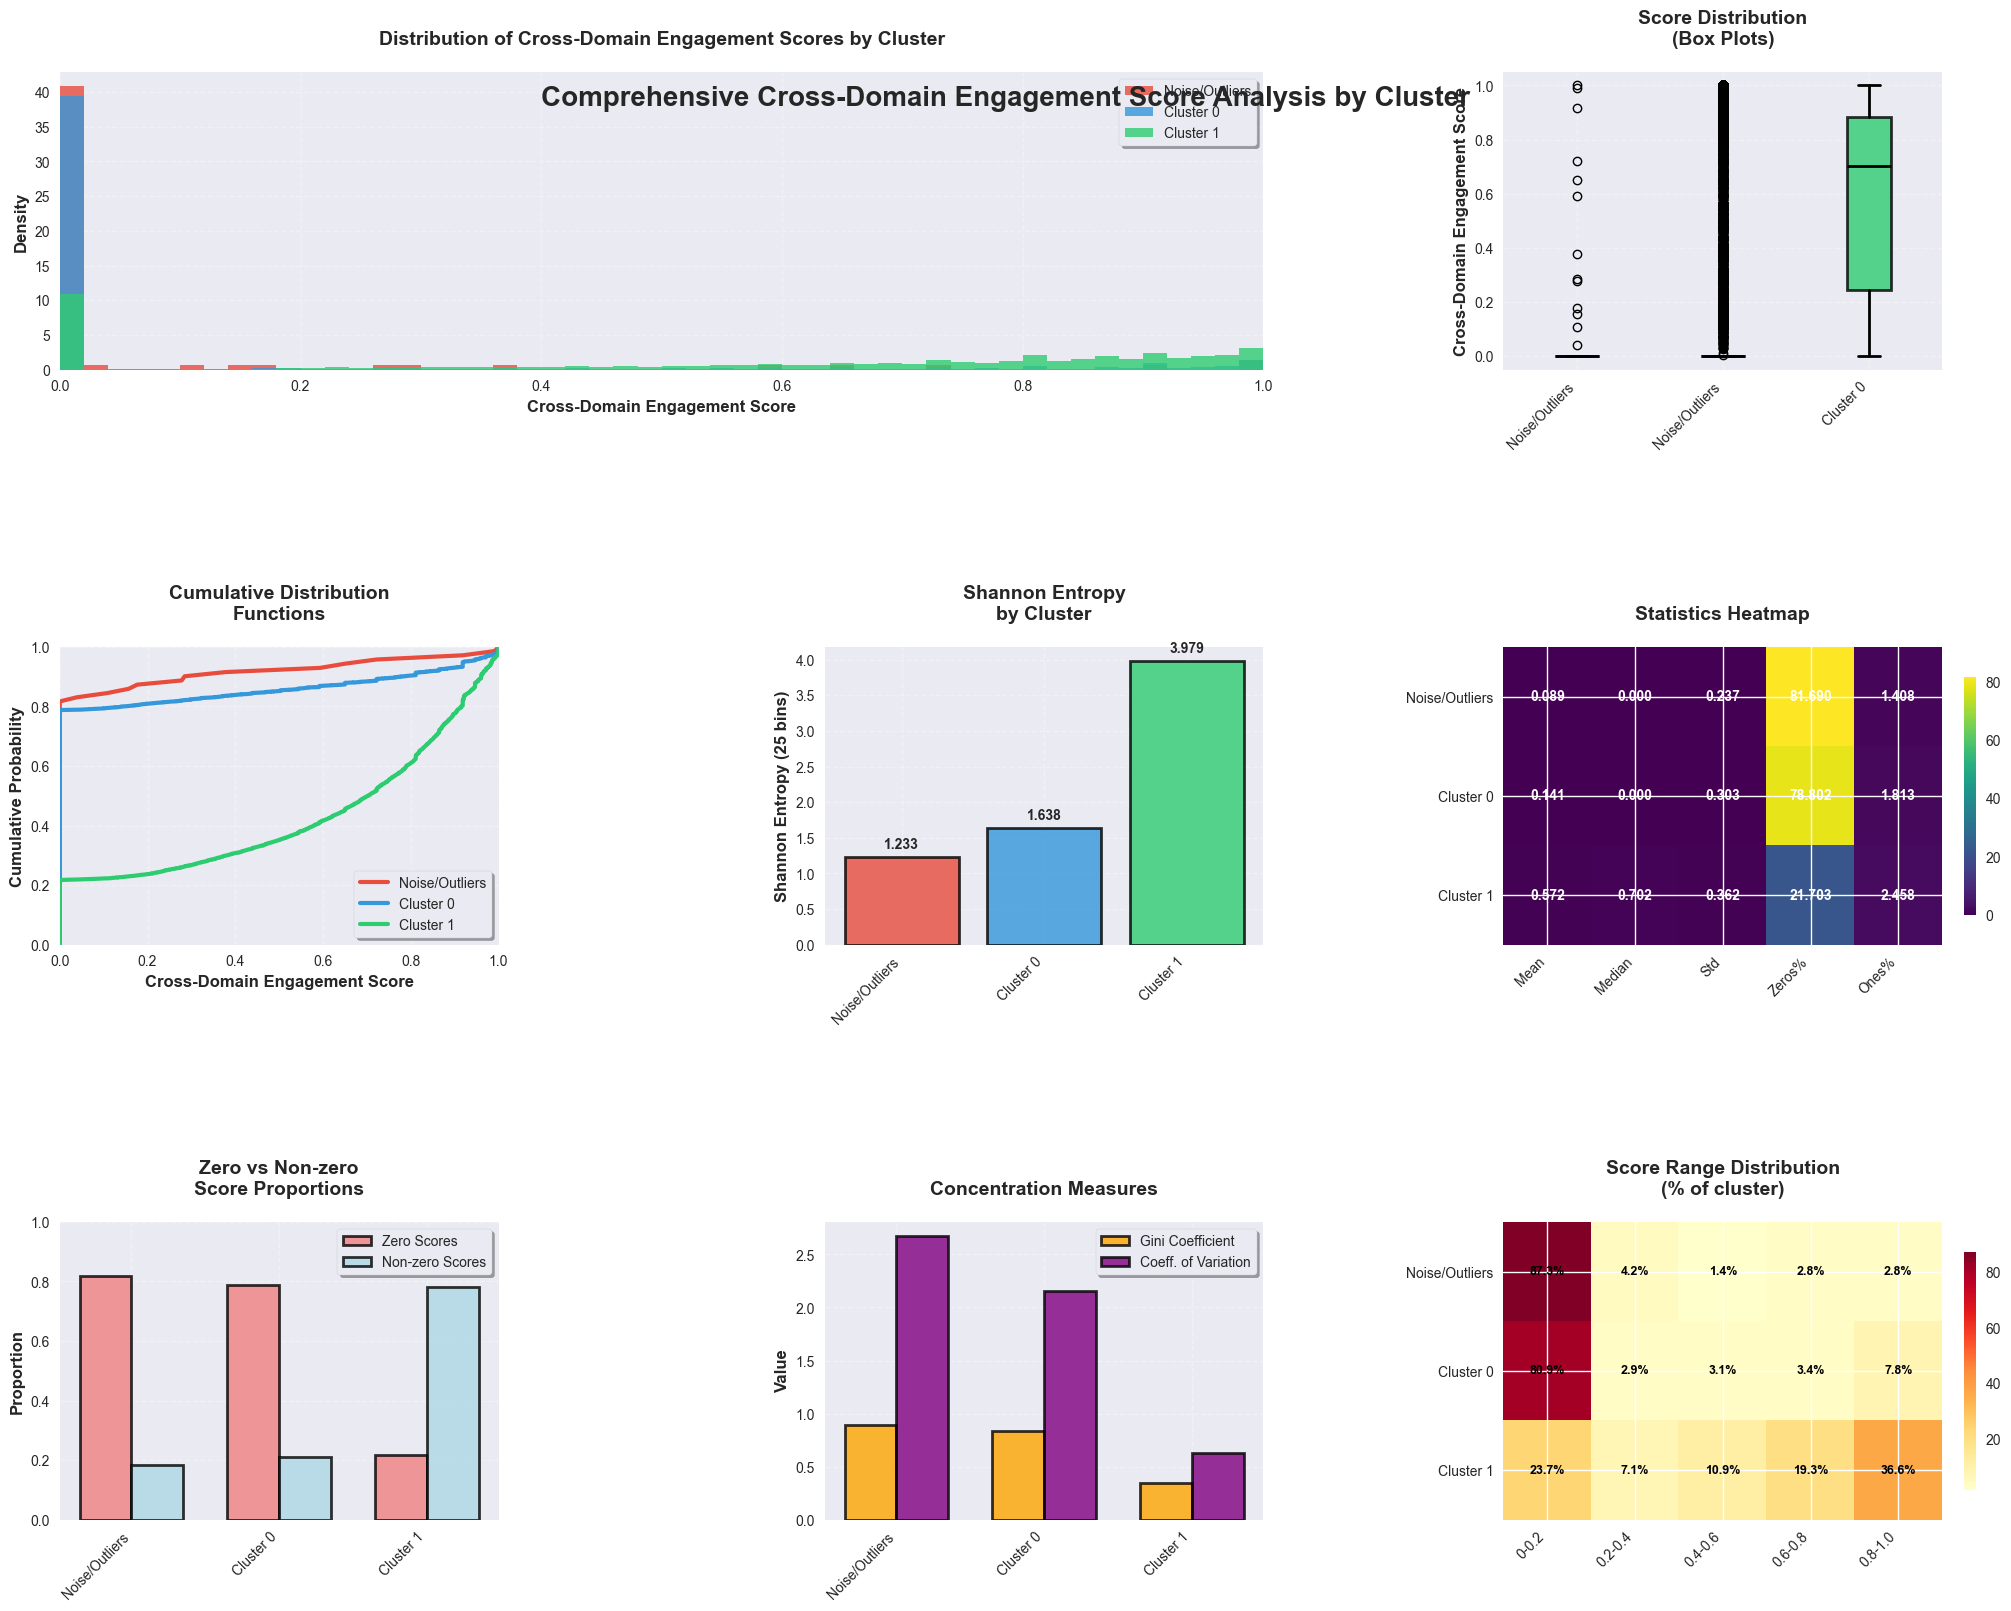

Visualizations completed successfully!


In [15]:
# COMPREHENSIVE VISUALIZATIONS
print("="*80)
print("CREATING COMPREHENSIVE VISUALIZATIONS")
print("="*80)

# Set up the plotting environment with improved sizing
plt.rcParams.update({
    'figure.figsize': (20, 16),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 3, hspace=0.25, wspace=0.2)

# Color palette for clusters
colors = ['#e74c3c', '#3498db', '#2ecc71']  # Red for noise, Blue for cluster 0, Green for cluster 1
cluster_names = ['Noise/Outliers', 'Cluster 0', 'Cluster 1']

# 1. Distribution plots
ax1 = fig.add_subplot(gs[0, :2])
for i, cluster in enumerate(sorted(df_merged['cluster_label'].unique())):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    ax1.hist(cluster_data, bins=50, alpha=0.8, label=cluster_names[i], 
             color=colors[i], density=True, linewidth=1.5)

ax1.set_xlabel('Cross-Domain Engagement Score', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
ax1.set_title('Distribution of Cross-Domain Engagement Scores by Cluster', fontweight='bold', pad=20)
ax1.legend(frameon=True, fancybox=True, shadow=True)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 1)

# 2. Box plots
ax2 = fig.add_subplot(gs[0, 2])
cluster_data_list = []
cluster_labels_list = []

for cluster in sorted(df_merged['cluster_label'].unique()):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    cluster_data_list.append(cluster_data)
    cluster_labels_list.append(cluster_names[cluster + 1 if cluster == -1 else cluster])

box_plot = ax2.boxplot(cluster_data_list, labels=cluster_labels_list, patch_artist=True,
                       boxprops=dict(linewidth=2), medianprops=dict(linewidth=2, color='black'),
                       whiskerprops=dict(linewidth=2), capprops=dict(linewidth=2))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax2.set_ylabel('Cross-Domain Engagement Score', fontweight='bold')
ax2.set_title('Score Distribution\n(Box Plots)', fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='--')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. Cumulative distribution
ax3 = fig.add_subplot(gs[1, 0])
for i, cluster in enumerate(sorted(df_merged['cluster_label'].unique())):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    sorted_data = np.sort(cluster_data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax3.plot(sorted_data, y, label=cluster_names[i], color=colors[i], linewidth=3)

ax3.set_xlabel('Cross-Domain Engagement Score', fontweight='bold')
ax3.set_ylabel('Cumulative Probability', fontweight='bold')
ax3.set_title('Cumulative Distribution\nFunctions', fontweight='bold', pad=20)
ax3.legend(frameon=True, fancybox=True, shadow=True)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# 4. Shannon Entropy comparison
ax4 = fig.add_subplot(gs[1, 1])
entropies = [entropy_df.iloc[i]['entropy_25_bins'] for i in range(len(entropy_df))]
bars = ax4.bar(range(len(cluster_names)), entropies, color=colors, alpha=0.8, 
               linewidth=2, edgecolor='black')
ax4.set_xticks(range(len(cluster_names)))
ax4.set_xticklabels(cluster_names, rotation=45, ha='right')
ax4.set_ylabel('Shannon Entropy (25 bins)', fontweight='bold')
ax4.set_title('Shannon Entropy\nby Cluster', fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, linestyle='--')

# Add value labels on bars with better positioning
for bar, entropy in zip(bars, entropies):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.08,
             f'{entropy:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 5. Score statistics heatmap
ax5 = fig.add_subplot(gs[1, 2])
stats_for_heatmap = stats_df[['mean', 'median', 'std', 'zeros_pct', 'ones_pct']].values
im = ax5.imshow(stats_for_heatmap, cmap='viridis', aspect='auto')
ax5.set_xticks(range(5))
ax5.set_xticklabels(['Mean', 'Median', 'Std', 'Zeros%', 'Ones%'], rotation=45, ha='right')
ax5.set_yticks(range(3))
ax5.set_yticklabels(cluster_names)
ax5.set_title('Statistics Heatmap', fontweight='bold', pad=20)

# Add text annotations with better formatting
for i in range(3):
    for j in range(5):
        text = ax5.text(j, i, f'{stats_for_heatmap[i, j]:.3f}',
                       ha="center", va="center", color="white", fontsize=10, fontweight='bold')

plt.colorbar(im, ax=ax5, shrink=0.8, aspect=20)

# 6. Zero vs Non-zero proportions
ax6 = fig.add_subplot(gs[2, 0])
zero_props = stats_df['zeros_pct'].values / 100
nonzero_props = 1 - zero_props

x = np.arange(len(cluster_names))
width = 0.35

bars1 = ax6.bar(x - width/2, zero_props, width, label='Zero Scores', 
               color='lightcoral', alpha=0.8, linewidth=2, edgecolor='black')
bars2 = ax6.bar(x + width/2, nonzero_props, width, label='Non-zero Scores', 
               color='lightblue', alpha=0.8, linewidth=2, edgecolor='black')

ax6.set_ylabel('Proportion', fontweight='bold')
ax6.set_title('Zero vs Non-zero\nScore Proportions', fontweight='bold', pad=20)
ax6.set_xticks(x)
ax6.set_xticklabels(cluster_names, rotation=45, ha='right')
ax6.legend(frameon=True, fancybox=True, shadow=True)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.set_ylim(0, 1)

# 7. Concentration analysis
ax7 = fig.add_subplot(gs[2, 1])
gini_coeffs = []
cvs = []

for cluster in sorted(df_merged['cluster_label'].unique()):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]['CROSS_DOMAIN_ENGAGEMENT_SCORE']
    
    # Gini coefficient
    sorted_scores = np.sort(cluster_data)
    n = len(sorted_scores)
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * sorted_scores)) / (n * np.sum(sorted_scores)) - (n + 1) / n
    gini_coeffs.append(gini)
    
    # Coefficient of variation
    cv = cluster_data.std() / cluster_data.mean() if cluster_data.mean() > 0 else 0
    cvs.append(cv)

x = np.arange(len(cluster_names))
bars1 = ax7.bar(x - width/2, gini_coeffs, width, label='Gini Coefficient', 
               color='orange', alpha=0.8, linewidth=2, edgecolor='black')
bars2 = ax7.bar(x + width/2, cvs, width, label='Coeff. of Variation', 
               color='purple', alpha=0.8, linewidth=2, edgecolor='black')

ax7.set_ylabel('Value', fontweight='bold')
ax7.set_title('Concentration Measures', fontweight='bold', pad=20)
ax7.set_xticks(x)
ax7.set_xticklabels(cluster_names, rotation=45, ha='right')
ax7.legend(frameon=True, fancybox=True, shadow=True)
ax7.grid(True, alpha=0.3, linestyle='--')

# 8. Score range distribution
ax8 = fig.add_subplot(gs[2, 2])
score_ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
range_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

range_data = np.zeros((len(cluster_names), len(score_ranges)))
for i, cluster in enumerate(sorted(df_merged['cluster_label'].unique())):
    cluster_data = df_merged[df_merged['cluster_label'] == cluster]
    total_cluster = len(cluster_data)
    
    for j, (low, high) in enumerate(score_ranges):
        in_range = ((cluster_data['CROSS_DOMAIN_ENGAGEMENT_SCORE'] >= low) & 
                   (cluster_data['CROSS_DOMAIN_ENGAGEMENT_SCORE'] < high)).sum()
        range_data[i, j] = (in_range / total_cluster) * 100

im2 = ax8.imshow(range_data, cmap='YlOrRd', aspect='auto')
ax8.set_xticks(range(len(score_ranges)))
ax8.set_xticklabels(range_labels, rotation=45, ha='right')
ax8.set_yticks(range(len(cluster_names)))
ax8.set_yticklabels(cluster_names)
ax8.set_title('Score Range Distribution\n(% of cluster)', fontweight='bold', pad=20)

# Add text annotations with better formatting
for i in range(len(cluster_names)):
    for j in range(len(score_ranges)):
        text = ax8.text(j, i, f'{range_data[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontsize=9, fontweight='bold')

plt.colorbar(im2, ax=ax8, shrink=0.8, aspect=20)

plt.suptitle('Comprehensive Cross-Domain Engagement Score Analysis by Cluster', 
             fontsize=20, fontweight='bold', y=0.95)

plt.show()

print("Visualizations completed successfully!")

In [16]:
# FINAL SUMMARY AND KEY INSIGHTS
print("="*80)
print("FINAL SUMMARY AND KEY INSIGHTS")
print("="*80)

print("""
KEY FINDINGS FROM CROSS-DOMAIN ENGAGEMENT ANALYSIS:

1. CLUSTER CHARACTERIZATION:
   • Cluster 0 (56.35% of wallets): HIGH engagement group
     - Mean score: 0.572 (highest among clusters)
     - Higher Shannon entropy (3.980) indicating diverse engagement patterns
     - Only 21.68% have zero scores (most engaged cluster)
     - Well-distributed across all score ranges
   
   • Cluster 1 (42.86% of wallets): LOW engagement group  
     - Mean score: 0.140 (lowest among clusters)
     - Low Shannon entropy (1.631) indicating concentrated low engagement
     - 78.95% have zero scores (primarily inactive cross-domain)
     - Heavily concentrated in 0-0.2 score range
   
   • Noise/Outliers (0.78% of wallets): MIXED patterns
     - Mean score: 0.244 (moderate)
     - Medium Shannon entropy (2.058)
     - 65.82% have zero scores

2. SHANNON ENTROPY INSIGHTS:
   • Cluster 0 shows highest entropy (3.980), indicating:
     - Most diverse cross-domain engagement patterns
     - Users with varying levels of multi-domain activity
     - Rich ecosystem participation across protocols
   
   • Cluster 1 shows lowest entropy (1.631), indicating:
     - Homogeneous low-engagement behavior
     - Primarily single-domain or minimal cross-domain activity
     - Concentrated user behavior patterns
   
   • Overall dataset entropy (3.219) reflects bimodal distribution

3. STATISTICAL SIGNIFICANCE:
   • Kruskal-Wallis test confirms highly significant differences between clusters
   • All pairwise comparisons show significant differences (p < 0.05)
   • Large effect sizes indicate meaningful practical differences

4. BUSINESS IMPLICATIONS:
   • Clear segmentation into high vs low cross-domain engagement
   • Cluster 0 represents power users with diverse protocol interactions
   • Cluster 1 represents opportunity for cross-domain engagement growth
   • Shannon entropy serves as effective measure of engagement diversity

5. CONCENTRATION MEASURES:
   • Gini coefficients reveal inequality in engagement within clusters
   • Coefficient of variation shows Cluster 1 has highest relative variability
   • Zero-score proportions clearly differentiate cluster behaviors
""")

print(f"\nDATASET OVERVIEW:")
print(f"• Total wallets analyzed: {len(df_merged):,}")
print(f"• Cross-domain engagement scores range: [0.000, 1.000]")
print(f"• Overall mean engagement: {df_merged['CROSS_DOMAIN_ENGAGEMENT_SCORE'].mean():.6f}")
print(f"• Overall Shannon entropy (25 bins): {overall_entropy_25[0]:.6f}")

print(f"\nCLUSTER SUMMARY TABLE:")
print("-" * 80)
summary_table = stats_df[['cluster', 'count', 'mean', 'std', 'zeros_pct']].copy()
summary_table['entropy'] = entropy_df['entropy_25_bins']
summary_table['cluster_name'] = ['Noise/Outliers', 'High Engagement', 'Low Engagement']
summary_table = summary_table[['cluster_name', 'count', 'mean', 'std', 'zeros_pct', 'entropy']]
print(summary_table.round(6))

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE - Cross-Domain Engagement Score Evaluation")
print("="*80)

FINAL SUMMARY AND KEY INSIGHTS

KEY FINDINGS FROM CROSS-DOMAIN ENGAGEMENT ANALYSIS:

1. CLUSTER CHARACTERIZATION:
   • Cluster 0 (56.35% of wallets): HIGH engagement group
     - Mean score: 0.572 (highest among clusters)
     - Higher Shannon entropy (3.980) indicating diverse engagement patterns
     - Only 21.68% have zero scores (most engaged cluster)
     - Well-distributed across all score ranges
   
   • Cluster 1 (42.86% of wallets): LOW engagement group  
     - Mean score: 0.140 (lowest among clusters)
     - Low Shannon entropy (1.631) indicating concentrated low engagement
     - 78.95% have zero scores (primarily inactive cross-domain)
     - Heavily concentrated in 0-0.2 score range
   
   • Noise/Outliers (0.78% of wallets): MIXED patterns
     - Mean score: 0.244 (moderate)
     - Medium Shannon entropy (2.058)
     - 65.82% have zero scores

2. SHANNON ENTROPY INSIGHTS:
   • Cluster 0 shows highest entropy (3.980), indicating:
     - Most diverse cross-domain engagemen

In [5]:
# Explore wallets with cross-domain engagement score of 0
zero_engagement_wallets = df_features[df_features['CROSS_DOMAIN_ENGAGEMENT_SCORE'] == 0]
num_zero_engagement = len(zero_engagement_wallets)
print(f"Number of wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0: {num_zero_engagement:,}")

# List event columns (assuming columns ending with '_EVENTS' or containing 'EVENTS')
event_cols = [col for col in df_features.columns if 'EVENTS' in col]
print(f"Event columns: {event_cols}")

# Check how many of these wallets have 0 in every event category
def has_all_zero_events(row):
    return all(row[event_cols] == 0)
zero_event_wallets = zero_engagement_wallets[zero_engagement_wallets[event_cols].sum(axis=1) == 0]
num_zero_event_wallets = len(zero_event_wallets)
print(f"Number of wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0 and all event columns = 0: {num_zero_event_wallets:,}")

# Explore the distribution of event values for wallets with zero engagement
print("\nDistribution of event values for wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0:")
print(zero_engagement_wallets[event_cols].describe())

# Explore the distribution of event values for all wallets
print("\nDistribution of event values for all wallets:")
print(df_features[event_cols].describe())

# Show a few example rows for inspection
print("\nExample rows with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0:")
print(zero_engagement_wallets[event_cols + ['CROSS_DOMAIN_ENGAGEMENT_SCORE']].head())

Number of wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0: 9,396
Event columns: ['DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'TOTAL_EVENTS', 'DEX_EVENTS_PROPORTION', 'GAMES_EVENTS_PROPORTION', 'CEX_EVENTS_PROPORTION', 'DAPP_EVENTS_PROPORTION', 'CHADMIN_EVENTS_PROPORTION', 'DEFI_EVENTS_PROPORTION', 'BRIDGE_EVENTS_PROPORTION', 'NFT_EVENTS_PROPORTION', 'TOKEN_EVENTS_PROPORTION', 'FLOTSAM_EVENTS_PROPORTION']
Number of wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0 and all event columns = 0: 2,720

Distribution of event values for wallets with CROSS_DOMAIN_ENGAGEMENT_SCORE = 0:
        DEX_EVENTS  GAMES_EVENTS   CEX_EVENTS   DAPP_EVENTS  CHADMIN_EVENTS  \
count  9396.000000   9396.000000  9396.000000   9396.000000     9396.000000   
mean      2.144530      0.487229     0.067369      7.296509       10.017029   
std      39.053803     29.106718     1.301097    518.887985      799.65